<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-#9-." data-toc-modified-id="Assignment-#9-.-1">Assignment #9 .</a></span><ul class="toc-item"><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-1.1">Time series analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2">Data preparation</a></span></li><li><span><a href="#Predicting-with-FB-Prophet" data-toc-modified-id="Predicting-with-FB-Prophet-1.3">Predicting with FB Prophet</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?" data-toc-modified-id="Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?-1.3.1"><font color="red">Question 1:</font> What is the prediction for 1st of January 17 00:00:00?</a></span></li><li><span><a href="#Question-2:-What-is-MAPE-equal-to?" data-toc-modified-id="Question-2:-What-is-MAPE-equal-to?-1.3.2"><font color="red">Question 2:</font> What is MAPE equal to?</a></span></li><li><span><a href="#Question-3:-What-is-MAE-equal-to?" data-toc-modified-id="Question-3:-What-is-MAE-equal-to?-1.3.3"><font color="red">Question 3:</font> What is MAE equal to?</a></span></li></ul></li><li><span><a href="#Predicting-with-ARIMA" data-toc-modified-id="Predicting-with-ARIMA-1.4">Predicting with ARIMA</a></span><ul class="toc-item"><li><span><a href="#Question-4:-What's-the-stationarity?" data-toc-modified-id="Question-4:-What's-the-stationarity?-1.4.1"><font color="red">Question 4:</font> What's the stationarity?</a></span></li><li><span><a href="#Question-5:-Best-hyperparameters-before-Box-Cox-transformation?" data-toc-modified-id="Question-5:-Best-hyperparameters-before-Box-Cox-transformation?-1.4.2"><font color="red">Question 5:</font> Best hyperparameters before Box-Cox transformation?</a></span></li><li><span><a href="#Question-6:-Best-hyperparameters-after-Box-Cox-transformation?" data-toc-modified-id="Question-6:-Best-hyperparameters-after-Box-Cox-transformation?-1.4.3"><font color="red">Question 6:</font> Best hyperparameters after Box-Cox transformation?</a></span></li><li><span><a href="#Question-7:-Draw-final-prediction-and-historical-data" data-toc-modified-id="Question-7:-Draw-final-prediction-and-historical-data-1.4.4"><font color="red">Question 7:</font> Draw final prediction and historical data</a></span></li></ul></li></ul></li></ul></div>

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# Assignment #9 . 
## Time series analysis

<font color='red'>Fill cells marked with "Your code here" and write answer below question after text "Type your answer here:"
    </font>    

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.6.0


## Data preparation

In [2]:
df = pd.read_csv('hour_online.csv')
df = df[df['Users'] != 0]
df.head()

,Time,Users
0,1/1/17 0:00,34002
1,1/1/17 1:00,37947
2,1/1/17 2:00,41517
3,1/1/17 3:00,44476
4,1/1/17 4:00,46234


In [3]:
df.shape

(2616, 2)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [4]:
df.Time = pd.to_datetime(df.Time)

In [5]:
plotly_df(df.set_index('Time')[["Users"]])

In [6]:
from fbprophet import Prophet

In [7]:
predictions = 30

df.columns = ['ds', 'y']
df.tail()

,ds,y
2620,2017-04-20 05:00:00,34833
2621,2017-04-20 06:00:00,35932
2622,2017-04-20 07:00:00,38418
2623,2017-04-20 08:00:00,40238
2624,2017-04-20 09:00:00,40763


In [8]:
train_df = df[:-predictions].copy()

In [9]:
m = Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=predictions, freq = 'H')
future.tail()

,ds
2611,2017-04-20 05:00:00
2612,2017-04-20 06:00:00
2613,2017-04-20 07:00:00
2614,2017-04-20 08:00:00
2615,2017-04-20 09:00:00


In [11]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2611,2017-04-20 05:00:00,35313.552909,37299.096784,47943.746481,35309.456534,35325.194111,7401.138199,7401.138199,7401.138199,8788.263876,8788.263876,8788.263876,-1387.125677,-1387.125677,-1387.125677,0.0,0.0,0.0,42714.691108
2612,2017-04-20 06:00:00,35322.168780,39369.597913,51198.531829,35313.630826,35338.633176,10094.722149,10094.722149,10094.722149,11417.666438,11417.666438,11417.666438,-1322.944289,-1322.944289,-1322.944289,0.0,0.0,0.0,45416.890929
2613,2017-04-20 07:00:00,35330.784651,41480.741432,52667.838638,35317.680219,35357.402854,11946.979577,11946.979577,11946.979577,13203.364932,13203.364932,13203.364932,-1256.385356,-1256.385356,-1256.385356,0.0,0.0,0.0,47277.764228
2614,2017-04-20 08:00:00,35339.400522,43435.705736,54580.786304,35324.711595,35379.327114,13551.414423,13551.414423,13551.414423,14739.078775,14739.078775,14739.078775,-1187.664352,-1187.664352,-1187.664352,0.0,0.0,0.0,48890.814945
2615,2017-04-20 09:00:00,35348.016393,44707.367834,56191.094541,35327.455355,35396.354564,14838.393219,14838.393219,14838.393219,15955.382618,15955.382618,15955.382618,-1116.989399,-1116.989399,-1116.989399,0.0,0.0,0.0,50186.409613


### <font color='red'>Question 1:</font> What is the prediction for 1st of January 17 00:00:00?

What is the prediction of the number of views of the wiki page on 1st of January 17? Round to the nearest integer.

- Type your answer here: 


In [14]:
print('The prediction on number of views for Jan 1, 17 00:00:00 is {}'.format(
      forecast[forecast['ds'] == '2017-01-01 00:00:00']['yhat'][0]))

The prediction on number of views for Jan 1, 17 00:00:00 is 39050.63269993132


Estimate the quality of the prediction with the last 30 points.

### <font color='red'>Question 2:</font> What is MAPE equal to?

- Type your answer here: 

### <font color='red'>Question 3:</font> What is MAE equal to?

- Type your answer here: 


In [15]:
## Taking the helper function from lecture notebook 2

def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [16]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2017-04-20 07:00:00,47277.764228,41480.741432,52667.838638,38418
2017-04-20 08:00:00,48890.814945,43435.705736,54580.786304,40238
2017-04-20 09:00:00,50186.409613,44707.367834,56191.094541,40763


In [17]:
for err_name, err_value in calculate_forecast_errors(cmp_df, predictions).items():
    print(err_name, err_value)

MAPE 12.68673930960169
MAE 4349.674995228121


## Predicting with ARIMA

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

### <font color='red'>Question 4:</font> What's the stationarity?

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?

- Is the series stationary (yes/no)? Answer: 
- What is p_value? Answer: p = 

/Users/amisha/.virtualenvs/mlcourse/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



p value is 0.24000379825187168


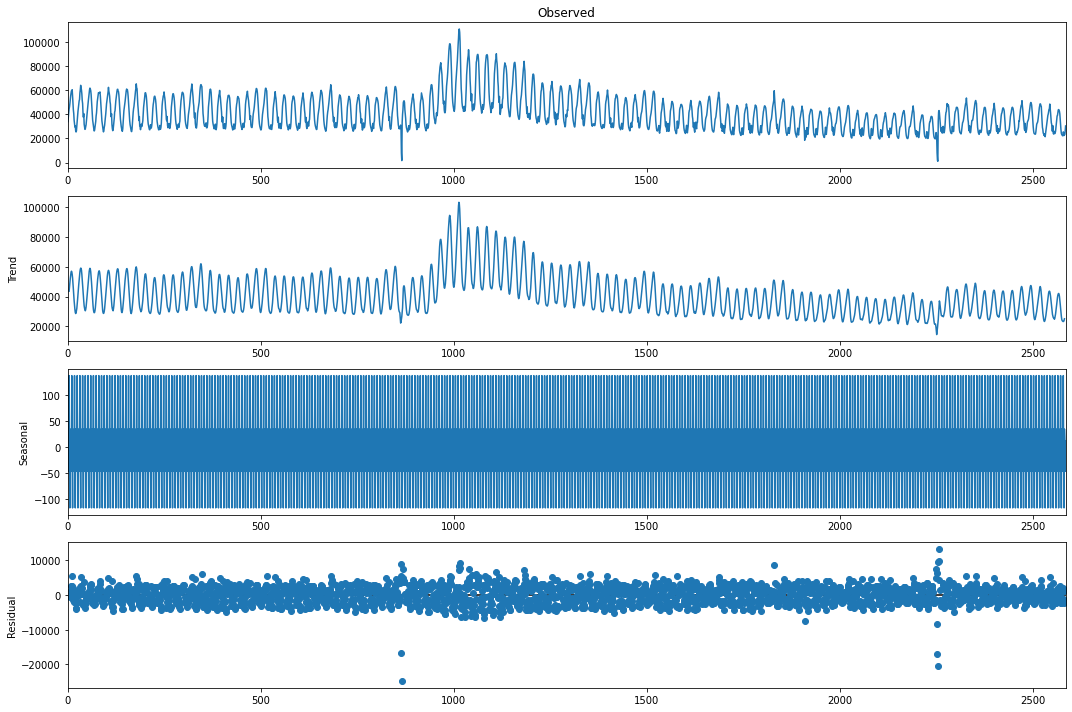

In [51]:
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot();
print('p value is {}'.format(sm.tsa.stattools.adfuller(train_df['y'])[1]))

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 5:</font> Best hyperparameters before Box-Cox transformation?

Try 1st and 2nd diff.

What parameters are the best for the model according to the `AIC` criterion?

Choose one option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2




In [46]:
from itertools import product
from tqdm import tqdm_notebook

# # setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

[(2, 0, 2, 0, 0, 0),
 (2, 0, 2, 0, 0, 1),
 (2, 0, 2, 0, 1, 0),
 (2, 0, 2, 0, 1, 1),
 (2, 0, 2, 0, 2, 0),
 (2, 0, 2, 0, 2, 1),
 (2, 0, 2, 1, 0, 0),
 (2, 0, 2, 1, 0, 1),
 (2, 0, 2, 1, 1, 0),
 (2, 0, 2, 1, 1, 1),
 (2, 0, 2, 1, 2, 0),
 (2, 0, 2, 1, 2, 1),
 (2, 0, 3, 0, 0, 0),
 (2, 0, 3, 0, 0, 1),
 (2, 0, 3, 0, 1, 0),
 (2, 0, 3, 0, 1, 1),
 (2, 0, 3, 0, 2, 0),
 (2, 0, 3, 0, 2, 1),
 (2, 0, 3, 1, 0, 0),
 (2, 0, 3, 1, 0, 1),
 (2, 0, 3, 1, 1, 0),
 (2, 0, 3, 1, 1, 1),
 (2, 0, 3, 1, 2, 0),
 (2, 0, 3, 1, 2, 1),
 (2, 0, 4, 0, 0, 0),
 (2, 0, 4, 0, 0, 1),
 (2, 0, 4, 0, 1, 0),
 (2, 0, 4, 0, 1, 1),
 (2, 0, 4, 0, 2, 0),
 (2, 0, 4, 0, 2, 1),
 (2, 0, 4, 1, 0, 0),
 (2, 0, 4, 1, 0, 1),
 (2, 0, 4, 1, 1, 0),
 (2, 0, 4, 1, 1, 1),
 (2, 0, 4, 1, 2, 0),
 (2, 0, 4, 1, 2, 1),
 (2, 1, 2, 0, 0, 0),
 (2, 1, 2, 0, 0, 1),
 (2, 1, 2, 0, 1, 0),
 (2, 1, 2, 0, 1, 1),
 (2, 1, 2, 0, 2, 0),
 (2, 1, 2, 0, 2, 1),
 (2, 1, 2, 1, 0, 0),
 (2, 1, 2, 1, 0, 1),
 (2, 1, 2, 1, 1, 0),
 (2, 1, 2, 1, 1, 1),
 (2, 1, 2, 1, 2, 0),
 (2, 1, 2, 1,

In [47]:
%%time
import warnings
from tqdm import tqdm
results1 = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except:
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results1.append([param, model.aic])

100%|██████████| 216/216 [36:30<00:00, 10.14s/it]

CPU times: user 1h 5min 8s, sys: 5min 18s, total: 1h 10min 27s
Wall time: 36min 30s


In [52]:

result_table1 = pd.DataFrame(results1)
result_table1.columns = ['parameters', 'aic']
print(result_table1.sort_values(by = 'aic', ascending=True).head())

             parameters           aic
210  (4, 1, 4, 1, 0, 0)  47691.165927
187  (4, 1, 2, 1, 0, 1)  47727.258959
48   (2, 1, 3, 0, 0, 0)  47727.573176
205  (4, 1, 4, 0, 0, 1)  47733.958943
181  (4, 1, 2, 0, 0, 1)  47736.207672


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 6:</font> Best hyperparameters after Box-Cox transformation?

No do the same as in Question 5, but with Box-Cox transformation.

What is the optimal Box-Cox transformation parameter?

- Type answer here:

What parameters are the best for the model according to the `AIC` criterion?

Choose on option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2


Now do the same, but for the series with Box-Cox transformation.

In [49]:
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.246704


In [50]:
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except:
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])
    
warnings.filterwarnings('default')

100%|██████████| 216/216 [26:04<00:00,  7.24s/it]


In [53]:
result_table2 = pd.DataFrame(results2)
result_table2.columns = ['parameters', 'aic']
print(result_table2.sort_values(by = 'aic', ascending=True).head())

             parameters          aic
158  (4, 0, 3, 0, 1, 1)  8276.782917
164  (4, 0, 3, 1, 1, 1)  8279.804248
170  (4, 0, 4, 0, 1, 1)  8283.580095
176  (4, 0, 4, 1, 1, 1)  8283.822127
104  (3, 0, 4, 1, 1, 1)  8291.481321


 
### <font color='red'>Question 7:</font> Draw final prediction and historical data

Don't forget to invere Box-Cox...

In [54]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [55]:
train_df2 = train_df.copy().set_index('ds')

In [56]:
train_df2['y'], lambda_prophet = stats.boxcox(train_df2['y'])
train_df2.reset_index(inplace=True)

In [57]:
m2 = Prophet()
m2.fit(train_df2)
future2 = m2.make_future_dataframe(periods=predictions)
forecast2 = m2.predict(future2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [58]:
for column in ['yhat', 'yhat_lower', 'yhat_upper']:
    forecast2[column] = inverse_boxcox(forecast2[column], lambda_prophet)

In [60]:
cmp_df2 = make_comparison_dataframe(df, forecast2)
for err_name, err_value in calculate_forecast_errors(cmp_df2, predictions).items():
    print(err_name, err_value)

MAPE 16.926658451783748
MAE 4928.196608236838


In [63]:
def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""
    
    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="magenta"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="magenta"),
                            fillcolor='rgba(68, 68, 68, 0.3)', 
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='Posts'), title=title, showlegend = False)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)



show_forecast(cmp_df, predictions, 100, 'No transformations')
show_forecast(cmp_df2, predictions, 100, 'Box–Cox transformation')